In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv


In [ ]:
import pandas as pd

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['credit_risk_dataset (1).csv']))
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


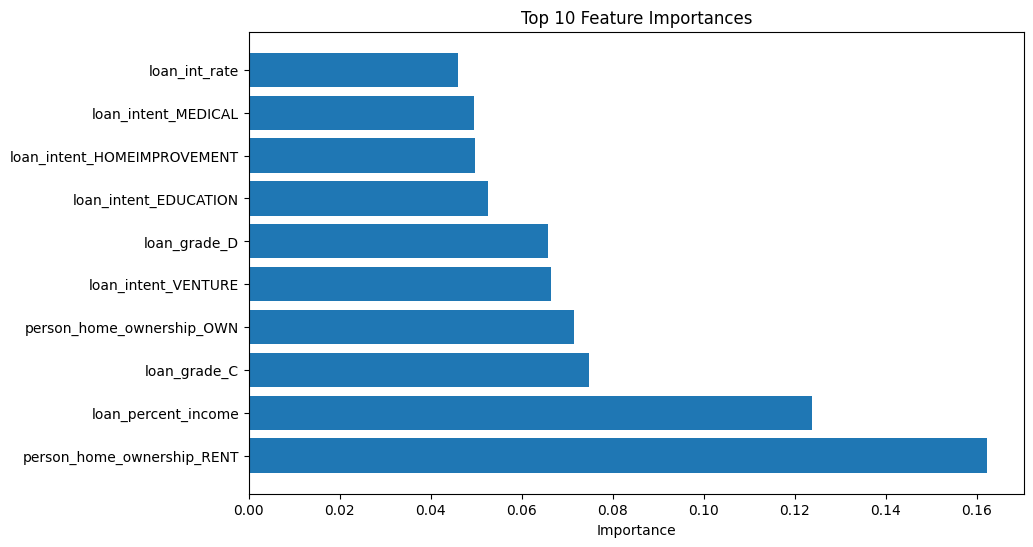

In [ ]:
#This is using a training dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


data = pd.read_csv('credit_risk_dataset (1).csv')

# Preprocessing
# Label encoding for categorical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBClassifier()
model.fit(X_train, y_train)

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()



In [ ]:
import pandas as pd
from xgboost import XGBClassifier

# Filter the data
important_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
data_filtered = data[important_features + ['loan_status']]

# Split the dataset into features and target variable
X = data_filtered.drop('loan_status', axis=1)
y = data_filtered['loan_status']

# Model training
model = XGBClassifier()
model.fit(X, y)

# Ask for user input
user_data = {}
for feature in important_features:
    user_input = input(f"Enter {feature}: ")
    user_data[feature] = [user_input]

# Create a new dataframe with user input
user_df = pd.DataFrame(user_data)
user_df['person_age'] = user_df['person_age'].astype(int)
user_df['person_income'] = user_df['person_income'].astype(float)
user_df['loan_amnt'] = user_df['loan_amnt'].astype(float)
user_df['loan_int_rate'] = user_df['loan_int_rate'].astype(float)
user_df['cb_person_cred_hist_length'] = user_df['cb_person_cred_hist_length'].astype(int)

# Make predictions for the new user
prediction = model.predict(user_df)

print()
print()
if prediction[0] == 0:
    print("Predicted Credit Risk: Non-default, lower credit risk")
    print()
    print("Your credit risk is lower, so it's essential to maintain your good credit standing.")
    print("1. Continue making payments on time.")
    print("2. Use credit responsibly and avoid overextending credit limits.")
    print("3. Regularly monitor your credit report for accuracy.")
else:
    print("Predicted Credit Risk: Default, Potential Risk")
    print("Your credit risk is higher, and there are ways to potentially improve your chances:")
    print("1. Improve Credit Score: Work on paying bills on time, reducing debts, and avoiding new credit inquiries.")
    print("2. Stable Employment: A longer and stable employment history could enhance your creditworthiness.")
    print("3. Lower Debt-to-Income Ratio: Minimize debts in relation to your income.")
    print("4. Building Savings: Having savings can depict financial responsibility.")



Enter person_age: 23
Enter person_income: 34444
Enter loan_amnt: 2000
Enter loan_int_rate: 2
Enter cb_person_cred_hist_length: 7


Predicted Credit Risk: Non-default, lower credit risk

Your credit risk is lower, so it's essential to maintain your good credit standing.
1. Continue making payments on time.
2. Use credit responsibly and avoid overextending credit limits.
3. Regularly monitor your credit report for accuracy.


In [ ]:
print ("Input credit score to view loan options:")
 # Input for the user's credit score
credit_score = int(input("credit score: "))

#Ranges for different loan eligibility based on credit score
loan_eligibility = {
    (300, 579): 'poor credit - eligible for Secured or Bad Credit Loans',
    (580, 669): 'fair credit - eligible for Personal or Secured Loans',
    (670, 739): 'good credit - eligible for Personal or Credit-builder Loans',
    (740, 799): 'very good credit - eligible for Various Loan Options',
    (800, 850): 'excellent credit - eligible for Most Loan Options'
}

# Determine loan eligibility based on credit score range
loan_type = None
for score_range, loan in loan_eligibility.items():
    if score_range[0] <= credit_score <= score_range[1]:
        loan_type = loan
        break

if loan_type:
    print(f"\nBased on your credit score {credit_score}, you have {loan_type}.")
else:
    print("\nUnable to determine loan eligibility based on the provided credit score.")


Input credit score to view loan options:
credit score: 566

Based on your credit score 566, you have poor credit - eligible for Secured or Bad Credit Loans.
